In [1]:
import numpy as np
import matplotlib.pyplot as plt

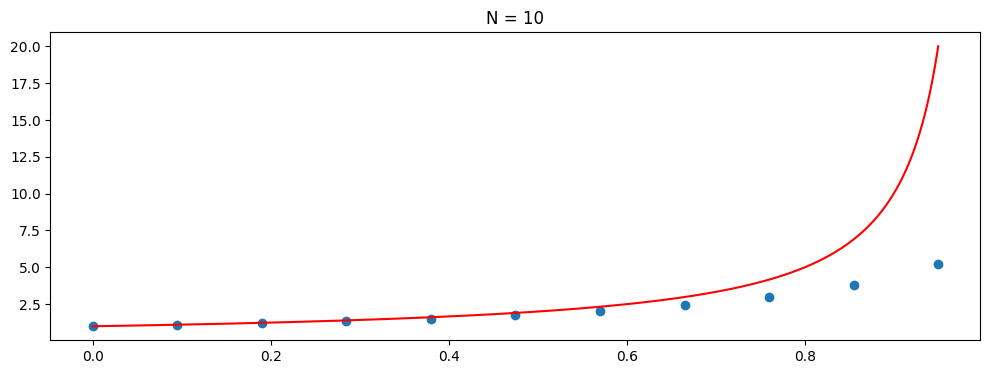

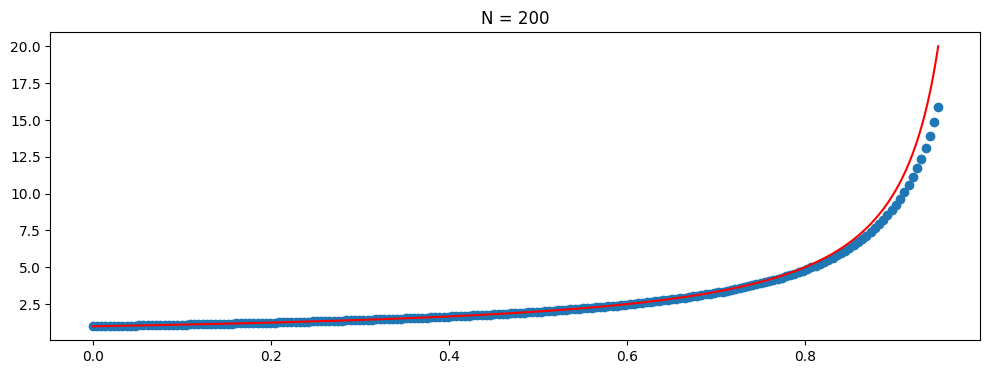

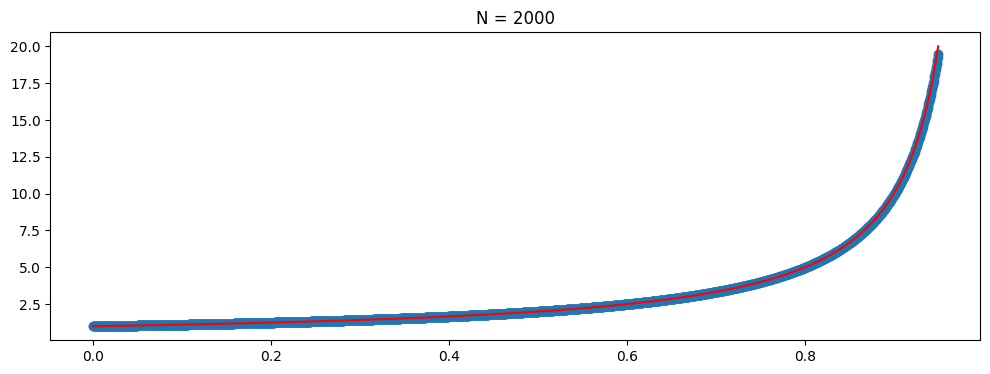

In [2]:
def x_prim(x,t):
    return x**2

def x_exact(t):
    return 1/(1-t)
T_0 = 0.0
T = 0.95
X_0 = 1.0
N_vals = [10, 200, 2000]
x_vals = np.linspace(T_0, T, 1000)
y_vals = x_exact(x_vals)
for N in N_vals:
    h = (T- T_0)/N
    wezly = np.linspace(T_0, T, N+1)
    rozwiazania = np.zeros(N+1)
    blad = np.zeros(N+1)
    for i, wezel in enumerate(wezly):
        if i == 0:
            rozwiazania[i] = X_0
            continue
        rozwiazania[i] = rozwiazania[i-1] + h*x_prim(rozwiazania[i-1], wezly[i-1])
        blad[i] = np.abs(rozwiazania[i] - x_exact(wezel))
    plt.figure(figsize=(12,4))
    plt.plot(x_vals, y_vals, c = 'r' )
    plt.title(f'N = {N}')
    plt.scatter(wezly, rozwiazania)
    plt.show()

In [3]:
import pandas as pd
from tabulate import tabulate

In [4]:
def scientific_format(x):
    if pd.isna(x) or x == 0:
        return str(x)
    
    exponent = int(np.floor(np.log10(abs(x))))
    
    coefficient = x / (10 ** exponent)
    
    if coefficient == int(coefficient):
        formatted_coefficient = f"{int(coefficient)}."
    else:
        formatted_coefficient = f"{coefficient:.2f}"
    
    return f"{formatted_coefficient} x 10^{exponent}"

+-------+--------------+--------------------------------+-------------+
|   N   |      h       |  err(N) = |x_N - cos()+sin()|  |    P_Num    |
+=======+==============+================================+=============+
|   1   | 7.85 x 10^-1 |          2.15 x 10^-1          |     nan     |
+-------+--------------+--------------------------------+-------------+
|   2   | 3.93 x 10^-1 |          8.35 x 10^-2          | 1.36 x 10^0 |
+-------+--------------+--------------------------------+-------------+
|   4   | 1.96 x 10^-1 |          3.58 x 10^-2          | 1.22 x 10^0 |
+-------+--------------+--------------------------------+-------------+
|   8   | 9.82 x 10^-2 |          1.65 x 10^-2          | 1.12 x 10^0 |
+-------+--------------+--------------------------------+-------------+
|  16   | 4.91 x 10^-2 |          7.93 x 10^-3          | 1.06 x 10^0 |
+-------+--------------+--------------------------------+-------------+
|  32   | 2.45 x 10^-2 |          3.89 x 10^-3          | 1.03 x

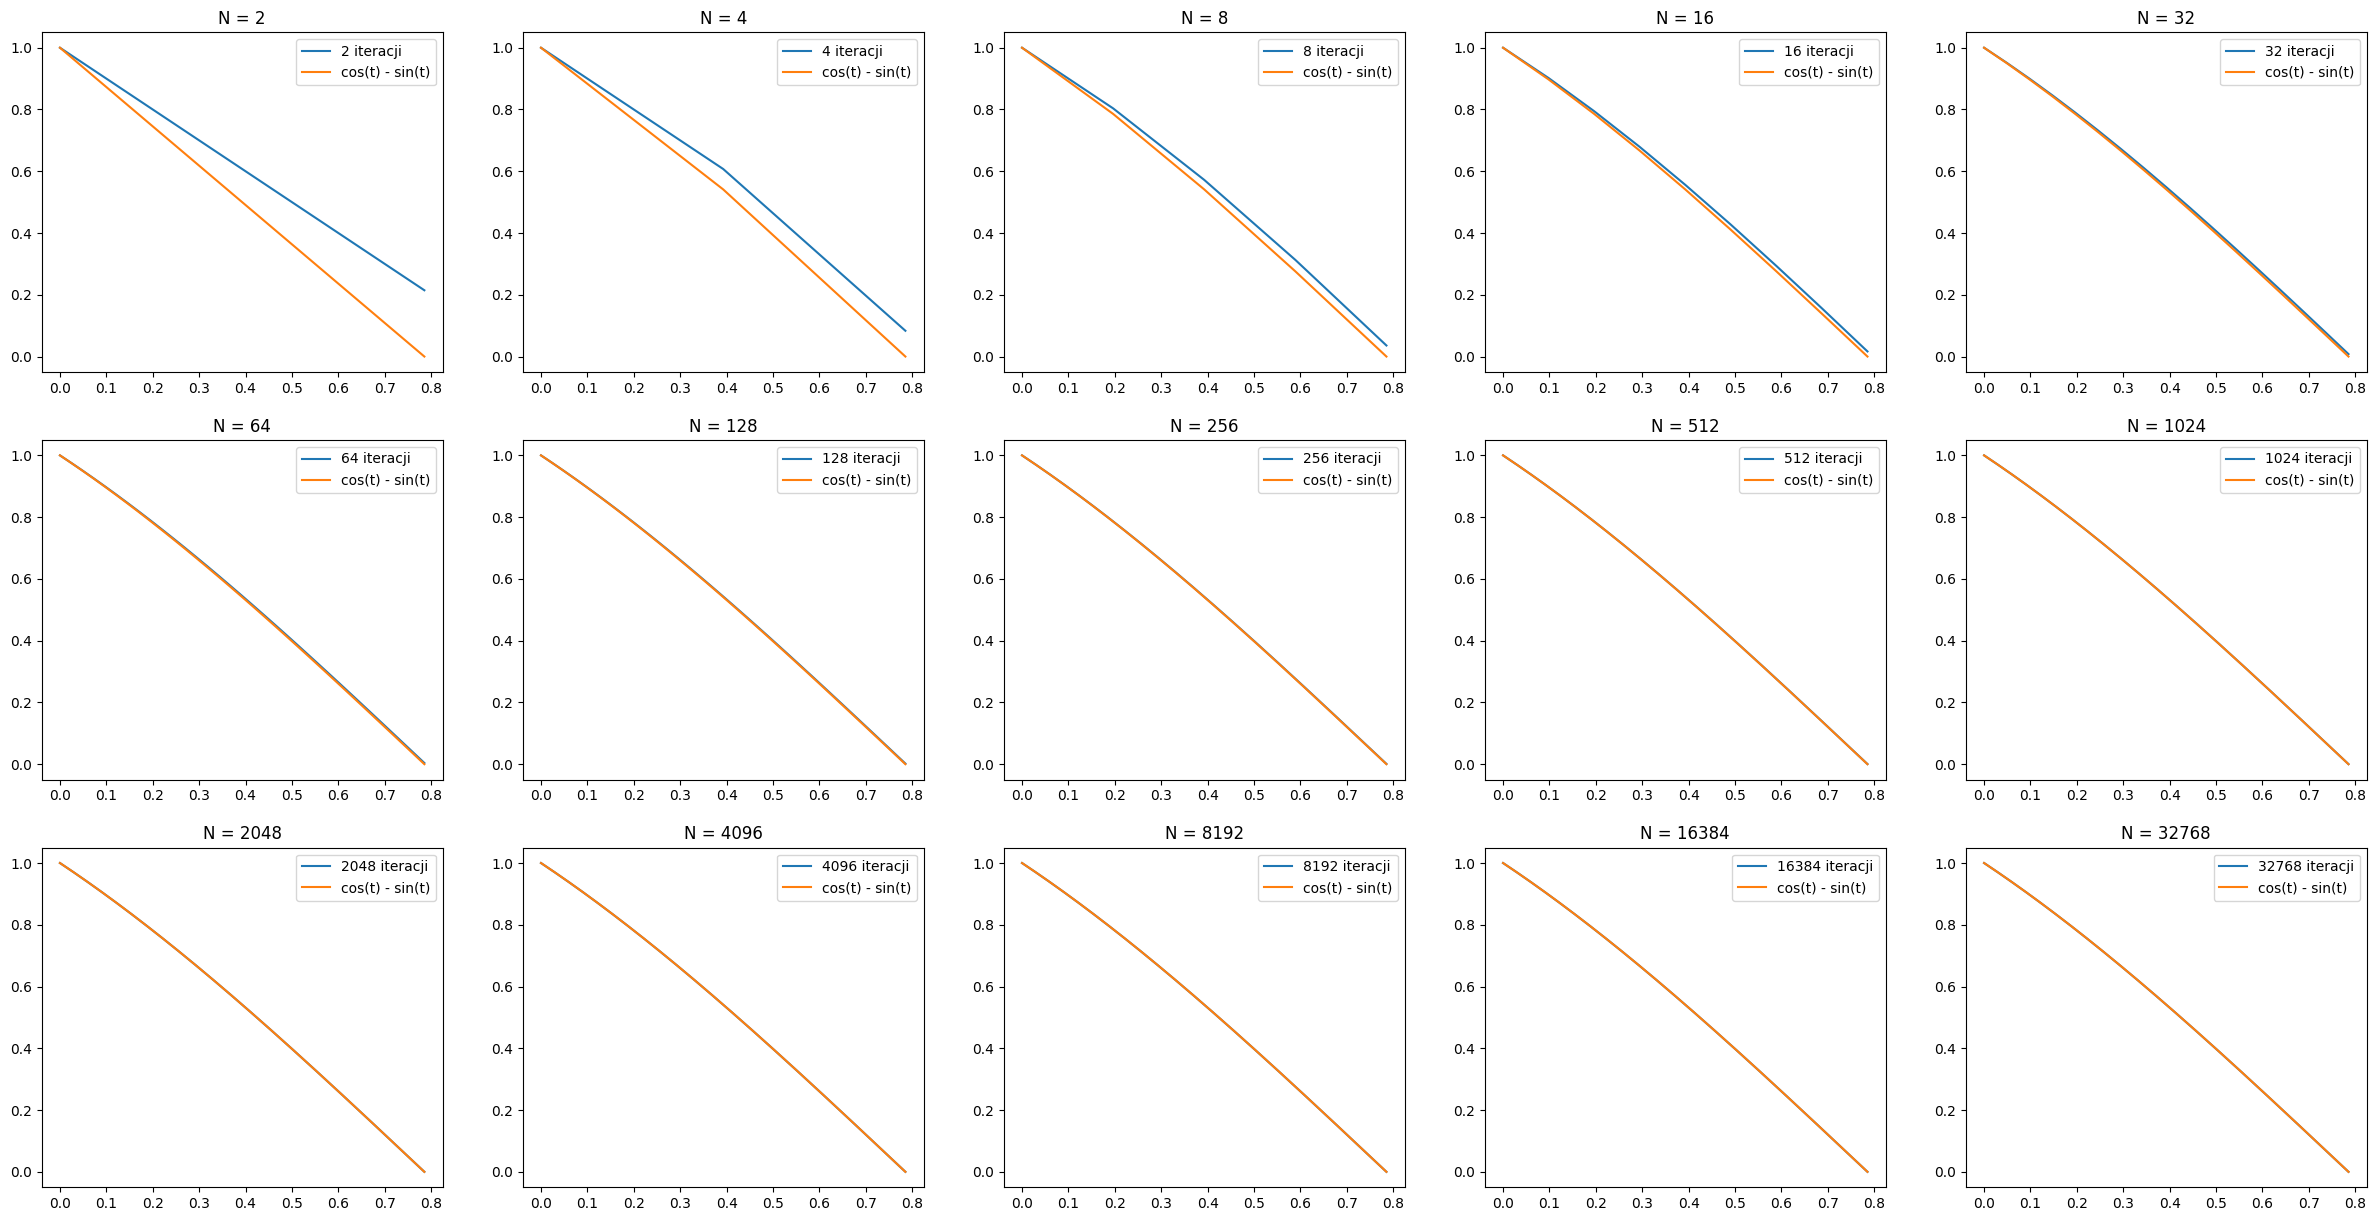

In [5]:
def x_prim(x, t):
    return -x*np.tan(t) - 1/np.cos(t)
T_0 = 0.0
T = np.pi/4
X_0 = 1.0
 
results = {"N": [], "h":[], "err(N) = |x_N - cos()+sin()|":[], 'P_Num':[]}
prev_error = None
N=1

fig, axes = plt.subplots(3, 5, figsize=(30, 15))  # Create a 3x5 grid of subplots
axes = axes.flatten() 


for _, ax in enumerate(axes):
    h = (T- T_0)/N
    wezly = np.linspace(T_0, T, N+1)
    rozwiazania = np.zeros(N+1)
    blad_punkty = np.zeros(N+1)
    for i, wezel in enumerate(wezly):
            if i == 0:
                rozwiazania[i] = X_0
                continue
            rozwiazania[i] = rozwiazania[i-1] + h*x_prim(rozwiazania[i-1], wezly[i-1])
            blad_punkty[i] = np.abs(rozwiazania[i] - (np.cos(wezel) - np.sin(wezel)))
    blad_end = np.abs(rozwiazania[-1] - (np.cos(T) - np.sin(T)))
    if prev_error is not None:
        p_num = np.log2(prev_error/blad_end)
    else:
        p_num = float('nan')
    prev_error = blad_end
    results["err(N) = |x_N - cos()+sin()|"].append(blad_end)
    results["P_Num"].append(p_num)
    results["N"].append(N)
    results["h"].append(h)
    N = N*2
    ax.plot(wezly, rozwiazania, label = f"{N} iteracji")
    ax.plot(wezly, np.cos(wezly) - np.sin(wezly), label = "cos(t) - sin(t)")
    ax.legend()
    ax.set_title(f'N = {N}')
 
results = pd.DataFrame(results)
results = results[['N', 'h', 'err(N) = |x_N - cos()+sin()|', 'P_Num']]
res = results.copy()
for col in ['h','err(N) = |x_N - cos()+sin()|', 'P_Num']:
    results[col] = results[col].apply(scientific_format)
print(tabulate(results, headers='keys', tablefmt='grid', numalign='center', stralign='center', showindex = False))


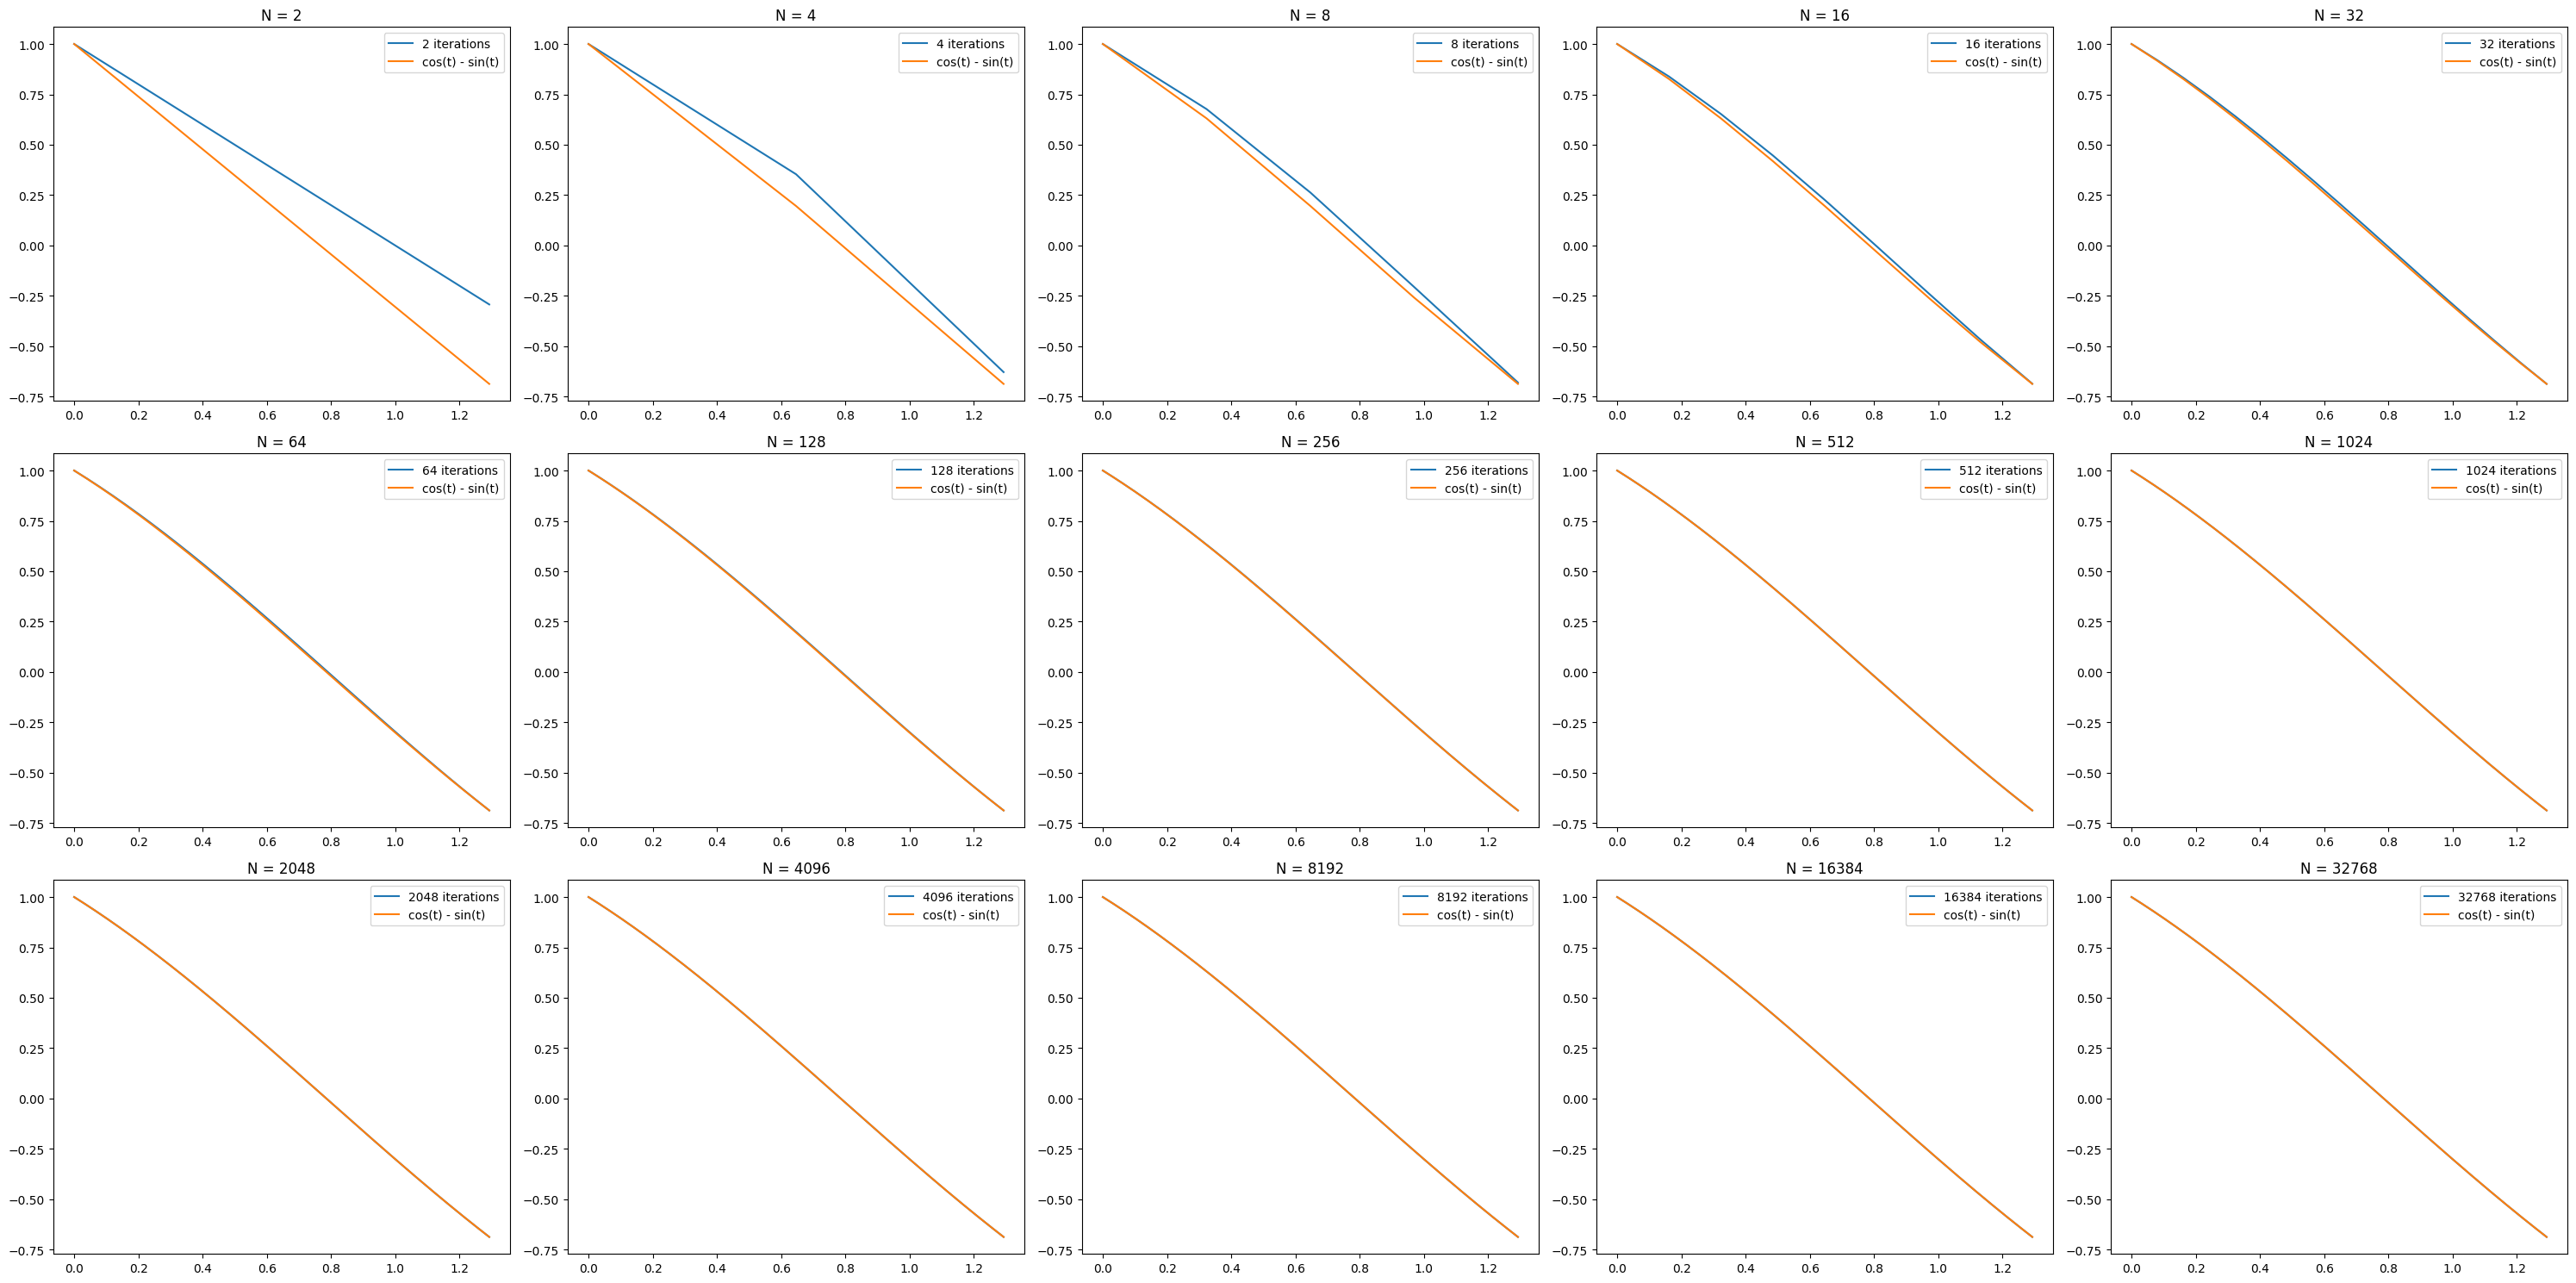

+-------+--------------+----------------------------------+---------+
|   N   |      h       |  err(N) = |x_N - cos() - sin()|  |  P_Num  |
+=======+==============+==================================+=========+
|   1   | 1.29 x 10^0  |           3.94 x 10^-1           |   nan   |
+-------+--------------+----------------------------------+---------+
|   2   | 6.46 x 10^-1 |           5.86 x 10^-2           | 2.75104 |
+-------+--------------+----------------------------------+---------+
|   4   | 3.23 x 10^-1 |           6.73 x 10^-3           | 3.12188 |
+-------+--------------+----------------------------------+---------+
|   8   | 1.62 x 10^-1 |           9.78 x 10^-4           | 2.78288 |
+-------+--------------+----------------------------------+---------+
|  16   | 8.08 x 10^-2 |           1.86 x 10^-4           | 2.39441 |
+-------+--------------+----------------------------------+---------+
|  32   | 4.04 x 10^-2 |           4.10 x 10^-5           | 2.18155 |
+-------+-----------

In [6]:
def x_prim(x, t):
    return -x*np.tan(t) - 1/np.cos(t)

T_0 = 0.0
T = 1.292695719373
X_0 = 1.0

results = {"N": [], "h": [], "err(N) = |x_N - cos() - sin()|": [], 'P_Num': []}
prev_error = None
N = 1

fig, axes = plt.subplots(3, 5, figsize=(30, 15))  # Create a 3x5 grid of subplots
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

for idx, ax in enumerate(axes):
    if idx >= 15:  # Stop if we exceed the number of iterations
        break
    h = (T - T_0) / N
    wezly = np.linspace(T_0, T, N + 1)
    rozwiazania = np.zeros(N + 1)
    blad_punkty = np.zeros(N + 1)
    for i, wezel in enumerate(wezly):
        if i == 0:
            rozwiazania[i] = X_0
            continue
        rozwiazania[i] = rozwiazania[i - 1] + h * x_prim(rozwiazania[i - 1], wezly[i - 1])
        blad_punkty[i] = np.abs(rozwiazania[i] - (np.cos(wezel) - np.sin(wezel)))
    blad_end = np.abs(rozwiazania[-1] - (np.cos(T) - np.sin(T)))
    if prev_error is not None:
        p_num = np.log2(prev_error / blad_end)
    else:
        p_num = float('nan')
    prev_error = blad_end
    results["err(N) = |x_N - cos() - sin()|"].append(blad_end)
    results["P_Num"].append(p_num)
    results["N"].append(N)
    results["h"].append(h)
    N = N * 2

    ax.plot(wezly, rozwiazania, label=f"{N} iterations")
    ax.plot(wezly, np.cos(wezly) - np.sin(wezly), label="cos(t) - sin(t)")
    ax.set_title(f'N = {N}')
    ax.legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

results = pd.DataFrame(results)
results = results[['N', 'h', 'err(N) = |x_N - cos() - sin()|', 'P_Num']]
res = results.copy()
for col in ['h', 'err(N) = |x_N - cos() - sin()|']:
    results[col] = results[col].apply(scientific_format)
print(tabulate(results, headers='keys', tablefmt='grid', numalign='center', stralign='center', showindex=False))


+-------+--------------+-------------------------------+----------+
|   N   |      h       |  err(N) = |x_N - sqrt(1-t2)|  |  P_Num   |
+=======+==============+===============================+==========+
|   1   |  1. x 10^0   |           1. x 10^0           |   nan    |
+-------+--------------+-------------------------------+----------+
|   2   |  5. x 10^-1  |         6.67 x 10^-1          | 0.584963 |
+-------+--------------+-------------------------------+----------+
|   4   | 2.50 x 10^-1 |         4.44 x 10^-1          | 0.584963 |
+-------+--------------+-------------------------------+----------+
|   8   | 1.25 x 10^-1 |         3.01 x 10^-1          | 0.561272 |
+-------+--------------+-------------------------------+----------+
|  16   | 6.25 x 10^-2 |         2.07 x 10^-1          | 0.539221 |
+-------+--------------+-------------------------------+----------+
|  32   | 3.12 x 10^-2 |         1.44 x 10^-1          |  0.5237  |
+-------+--------------+------------------------

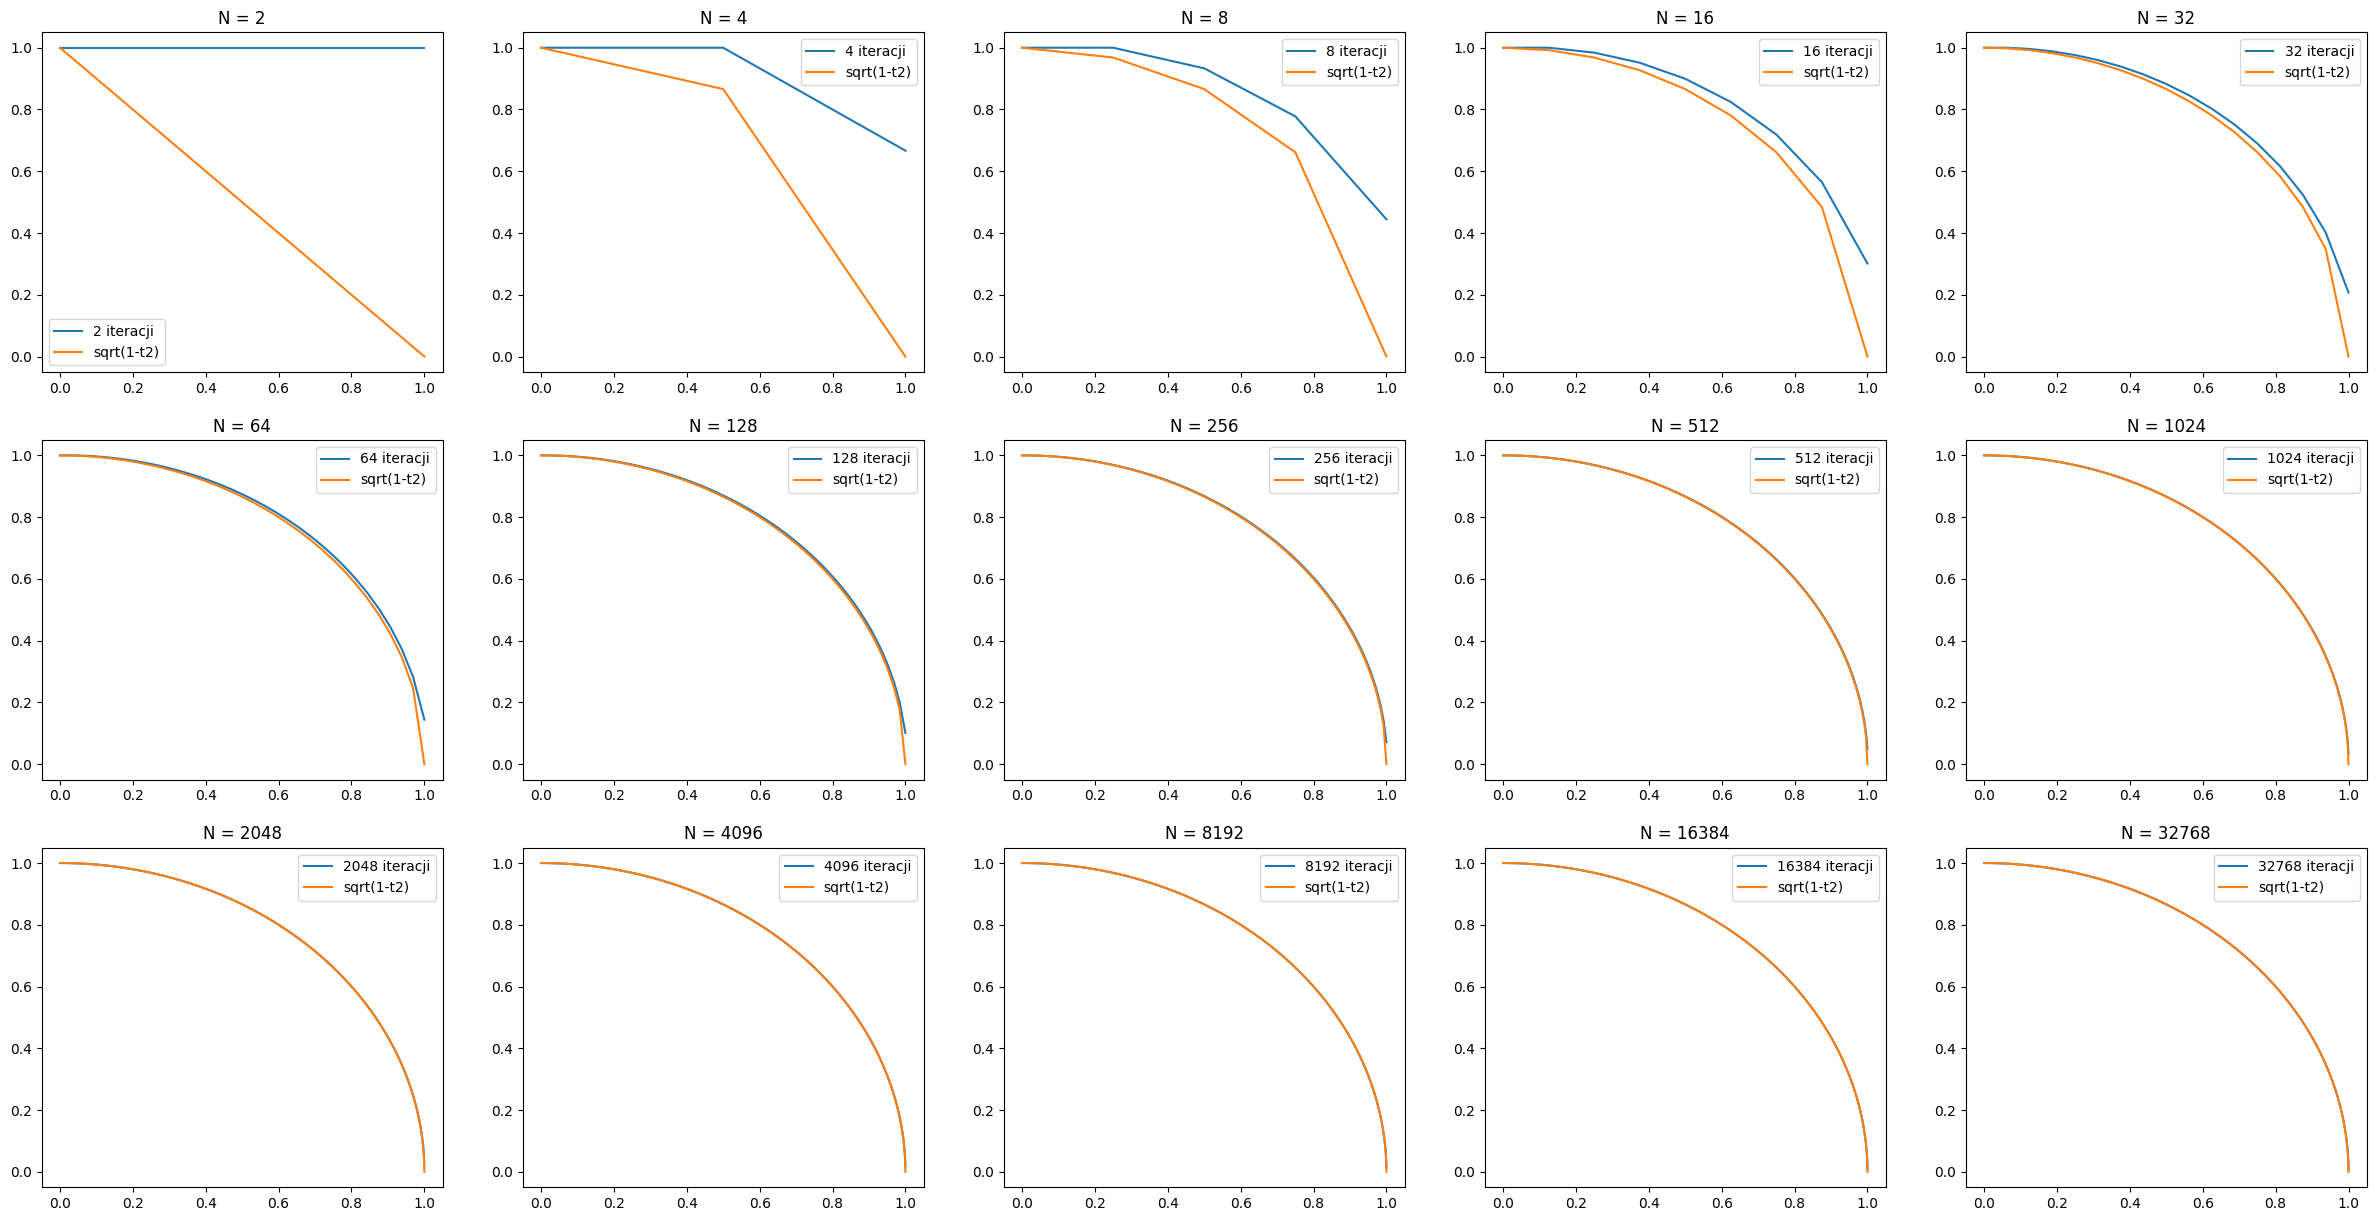

In [7]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
def x_prim(x, t):
    return -(t*x)/(1-t**2)
T_0 = 0.0
T = 1.0
X_0 = 1.0
 
results = {"N": [], "h":[], "err(N) = |x_N - sqrt(1-t2)|":[], 'P_Num':[]}
prev_error = None
N=1
fig, axes = plt.subplots(3,5, figsize=(30, 15))
axes = axes.flatten()
for _, ax in enumerate(axes):
    h = (T- T_0)/N
    wezly = np.linspace(T_0, T, N+1)
    rozwiazania = np.zeros(N+1)
    blad_punkty = np.zeros(N+1)
    for i, wezel in enumerate(wezly):
            if i == 0:
                rozwiazania[i] = X_0
                continue
            rozwiazania[i] = rozwiazania[i-1] + h*x_prim(rozwiazania[i-1], wezly[i-1])
            blad_punkty[i] = np.abs(rozwiazania[i] - (np.sqrt(1-wezel**2)))
    blad_end = np.abs(rozwiazania[-1] - (np.sqrt(1-T**2)))
    if prev_error is not None:
        p_num = np.log2(prev_error/blad_end)
    
    else:
        p_num = float('nan')
    prev_error = blad_end
    results["err(N) = |x_N - sqrt(1-t2)|"].append(blad_end)
    results["P_Num"].append(p_num)
    results["N"].append(N)
    results["h"].append(h)
    N = N*2
    ax.plot(wezly, rozwiazania, label = f"{N} iteracji")
    ax.plot(wezly, np.sqrt(1-wezly**2), label = "sqrt(1-t2)")
    ax.set_title(f'N = {N}')
    ax.legend()
 
results = pd.DataFrame(results)
results = results[['N', 'h', 'err(N) = |x_N - sqrt(1-t2)|', 'P_Num']]
res = results.copy()
for col in ['h','err(N) = |x_N - sqrt(1-t2)|']:
    results[col] = results[col].apply(scientific_format)
print(tabulate(results, headers='keys', tablefmt='grid', numalign='center', stralign='center', showindex = False))


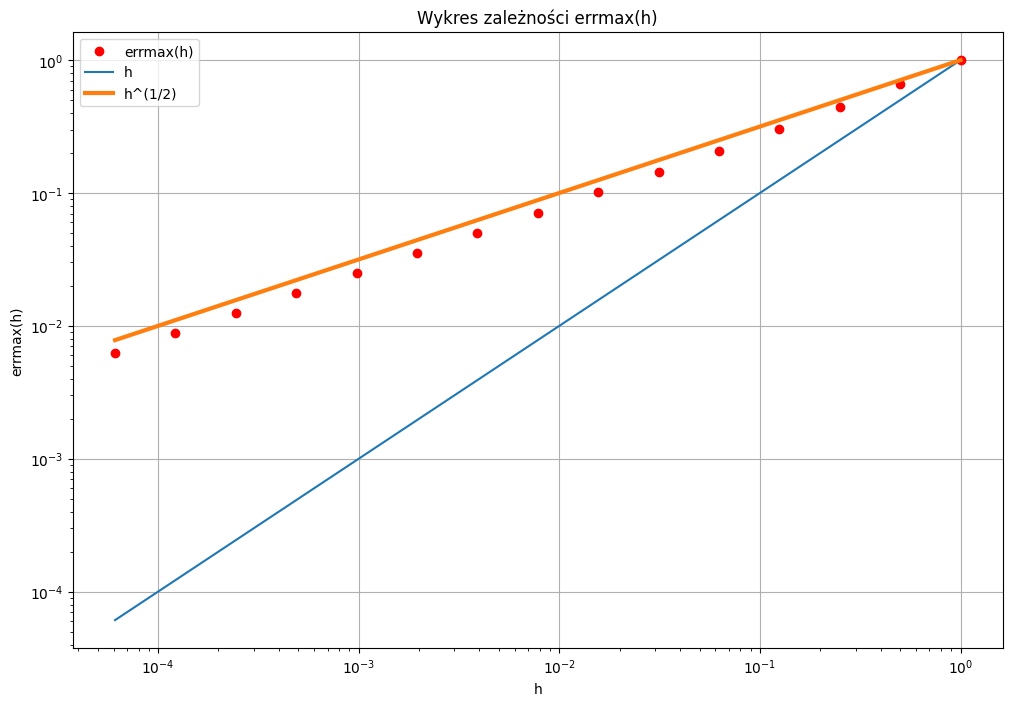

In [8]:
plt.figure(figsize=(12,8))
plt.plot(res['h'], res['err(N) = |x_N - sqrt(1-t2)|'], 'ro', label='errmax(h)')
plt.plot(res['h'], res['h'], label = 'h')
plt.plot(res['h'], res['h'] ** (1/2), linewidth=3, label = 'h^(1/2)')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.title("Wykres zależności errmax(h)")
plt.xlabel('h')
plt.ylabel('errmax(h)')
plt.show()

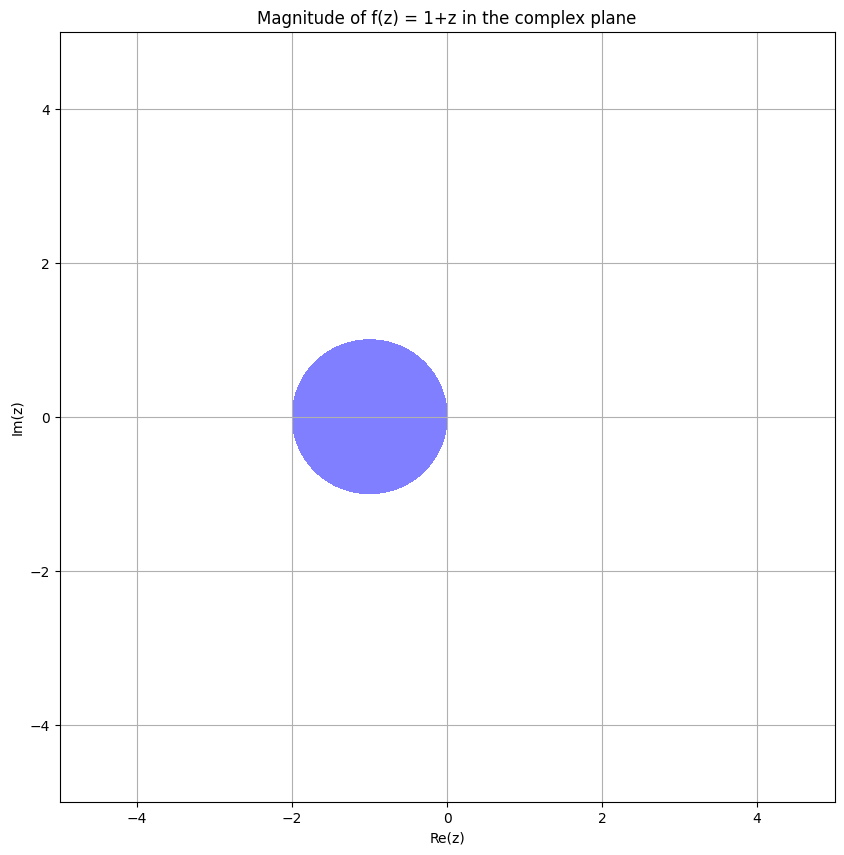

In [9]:
def complex_function(z):
    return 1 + z

real = np.linspace(-5, 5, 500)
imag = np.linspace(-5, 5, 500)
real, imag = np.meshgrid(real, imag)
z = real + 1j * imag

f_z = complex_function(z)
plt.figure(figsize=(10, 10))
# plt.contour(real, imag, np.abs(f_z), levels=[1], colors='white', linewidths=2, alpha=0.5)

plt.contourf(real, imag, np.abs(f_z), levels=[0,1], colors = ["blue", "white"], alpha=0.5)

plt.title(r'Magnitude of f(z) = 1+z in the complex plane')
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.grid(True)
plt.show()

0
0


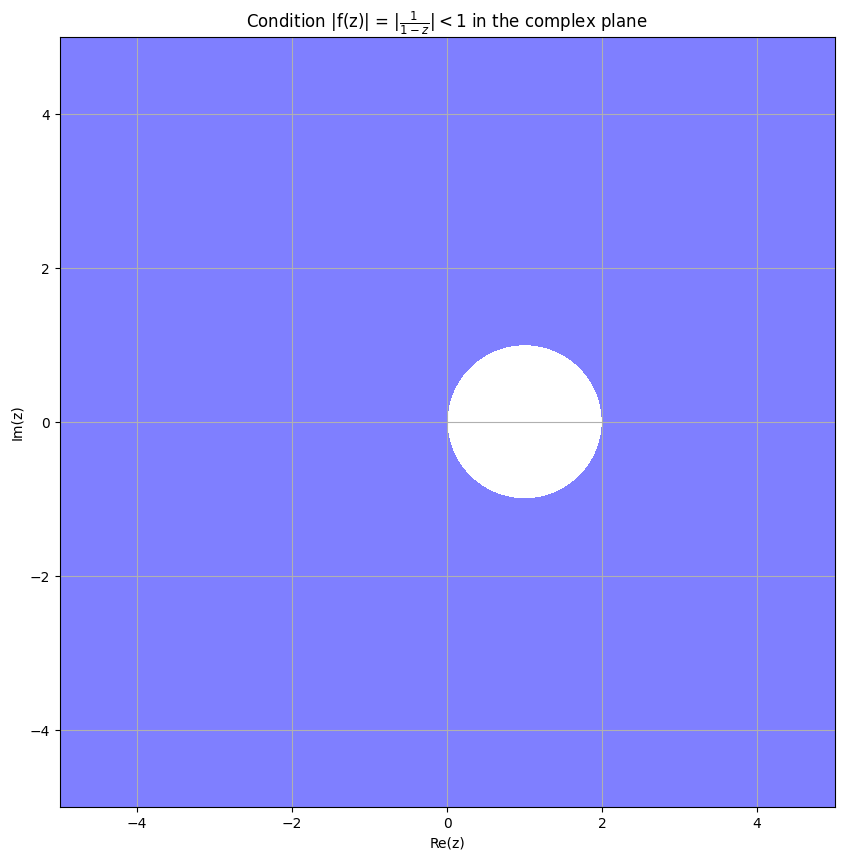

In [15]:
def complex_function(z):
    return 1/(1 - z)

real = np.linspace(-5, 5, 10000)
imag = np.linspace(-5, 5, 10000)
print(np.sum(np.where(real == 0)))
print(np.sum(np.where(imag == 0)))

real, imag = np.meshgrid(real, imag)
z = real + 1j * imag

f_z = complex_function(z)

plt.figure(figsize=(10, 10))
# circ = plt.contour(real, imag, np.abs(f_z), levels=[1], colors='black', linewidths=2, alpha=0.5)
# plt.contourf(real, imag, np.angle(f_z), levels=100, cmap='Reds')

plt.contourf(real, imag, np.where(np.abs(f_z) < 1, 1, 0), levels = 1, colors = ["white","blue"], alpha = 0.5)



plt.title(r'Condition |f(z)| = $|\frac{1}{1-z}| < 1$ in the complex plane')
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.grid(True)
plt.show()

0
0


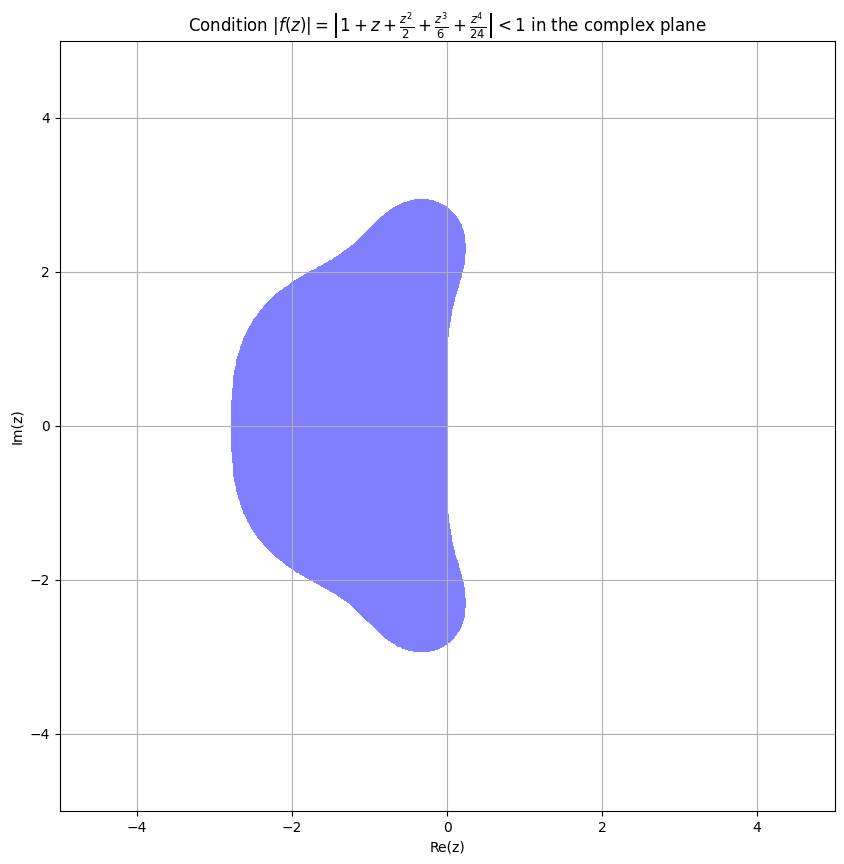

In [18]:
def complex_function(z):
    return 1+z+np.power(z,2)/2+np.power(z,3)/6+np.power(z,4)/24

real = np.linspace(-5, 5, 1000)
imag = np.linspace(-5, 5, 1000)
print(np.sum(np.where(real == 0)))
print(np.sum(np.where(imag == 0)))

real, imag = np.meshgrid(real, imag)
z = real + 1j * imag

f_z = complex_function(z)

plt.figure(figsize=(10, 10))
# circ = plt.contour(real, imag, np.abs(f_z), levels=[1], colors='black', linewidths=2, alpha=0.5)
# plt.contourf(real, imag, np.angle(f_z), levels=100, cmap='Reds')

plt.contourf(real, imag, np.where(np.abs(f_z) < 1, 1, 0), levels = 1, colors = ["white","blue"], alpha = 0.5)

plt.title(r'Condition $|f(z)| = \left|1 + z + \frac{z^2}{2} + \frac{z^3}{6} + \frac{z^4}{24}\right| < 1$ in the complex plane')

plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.grid(True)
plt.show()